<a href="https://colab.research.google.com/github/HaroldRen99/22WEcon441/blob/main/22w441b_In_Class_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/CLV.csv")


In [ ]:
df.head()

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1


In [ ]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,50), (10,120,15)], 
    "activation" : ['relu','logistic','tanh'],
    "alpha" : [0.01, 0.002]
}

In [ ]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'alpha': [0.01, 0.002],
                         'hidden_layer_sizes': [(10, 50), (10, 120, 15)]})

In [ ]:
print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10, 120, 15)}


# Train a model with the optimal solution from GridSearch

In [ ]:
model = MLPRegressor(**grid.best_params_)

In [ ]:
p_dict = {
    "hidden_layer_sizes": (10,120,15), 
    "alpha": 0.002,
    "activation" : 'relu'
}

model = MLPRegressor(**p_dict)

# What are the in-sample and out of sample MSEs

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("In-sample MSE: ", mse_train)
print("Out-of-sample MSE: ", mse_test)

In-sample MSE:  42816436.67173271
Out-of-sample MSE:  43512065.199905075


# Build a Keras with the architecture defined by GridSearchCV

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(120, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

In [ ]:
model.compile(loss = 'mse', optimizer = Adam(lr = 0.002))
model.fit(X_train, y_train, batch_size=32, epochs=1000)

Epoch 1/1000
200/200 [==============================] - 1s 2ms/step - loss: 109459464.0000
Epoch 2/1000
200/200 [==============================] - 0s 2ms/step - loss: 77272184.0000
Epoch 3/1000
200/200 [==============================] - 0s 2ms/step - loss: 48502064.0000
Epoch 4/1000
200/200 [==============================] - 0s 2ms/step - loss: 45326544.0000
Epoch 5/1000
200/200 [==============================] - 0s 2ms/step - loss: 44688296.0000
Epoch 6/1000
200/200 [==============================] - 0s 2ms/step - loss: 44358332.0000
Epoch 7/1000
200/200 [==============================] - 0s 2ms/step - loss: 44158344.0000
Epoch 8/1000
200/200 [==============================] - 0s 2ms/step - loss: 43994840.0000
Epoch 9/1000
200/200 [==============================] - 0s 1ms/step - loss: 43885948.0000
Epoch 10/1000
200/200 [==============================] - 0s 1ms/step - loss: 43821144.0000
Epoch 11/1000
200/200 [==============================] - 0s 1ms/step - loss: 43719108.0000
Epoch 1

# Make two visualizations of your NN using “plot_model” and “ann_viz”

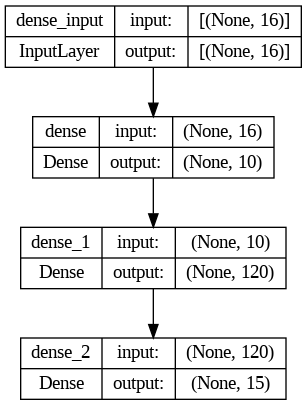

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file = 'NN model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, view = True, title = "Neural Network Architecture", filename = "viz.png")

In [ ]:
from IPython.display import Image
Image(filename = "viz.png")